In [1]:
import equation
from equation import SDE, GeometricBrownianMotion1D, GeometricBrownianMotionND, BlackSchloesCall1D
import numpy as np
import matplotlib.pyplot as plt
import yaml

# Euler Method

Simulating Steps: 100%|██████████| 1000/1000 [00:03<00:00, 274.97it/s]


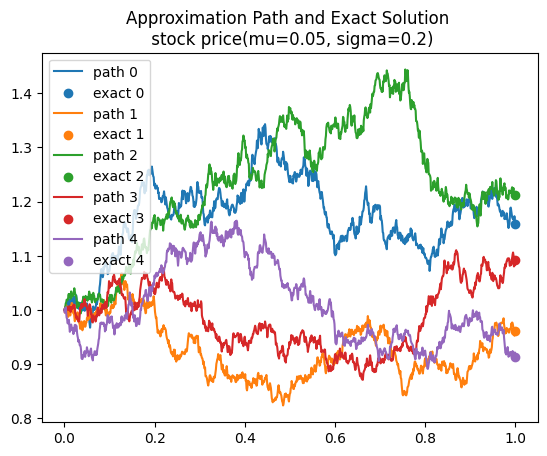

In [3]:
mu = 0.05  
sigma = 0.2
strike = 1.25
rf = 0.05
stock = GeometricBrownianMotion1D(mu, sigma, 'configs.yaml')
call = BlackSchloesCall1D(mu, sigma, strike, rf, configs='configs.yaml')
# y as call exact price
y_exact = call.exact_solution()

t, x, dw = stock.simulate(scheme='euler')
exact = stock.exact_solution(dw)
for i in range(5):
    plt.plot(t, x[i, :].reshape((call.N+1)), label=f'path {i}')
    plt.scatter(call.T, exact[i], label=f'exact {i}')
plt.title(f'Approximation Path and Exact Solution \n stock price(mu={mu}, sigma={sigma})')
plt.legend()
plt.show()

In [5]:
x_T = x[:, -1]
y_T = []
for i in x_T:
    _ = call.terminal_condition(i)
    y_T.append(_)
y_T = np.array(y_T)
y_mc = y_T.mean()
T = call.T
y_exact, y_mc*np.exp(-rf*T), (y_exact - y_mc*np.exp(-rf*T))/y_exact*100

(0.023242744660152276, 0.023257970580852574, -0.06550827332540232)